In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder,Imputer,StandardScaler
from sklearn.linear_model import LogisticRegression
import datetime
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
# import xgboost
%matplotlib inline


C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.sta

In [2]:
# Load the SAS data
# Change the Unicode to 'utf-8'
# Remove the preceding 'b' character
comclas = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\comclas.sas7bdat',format='sas7bdat', encoding='utf-8')
commaint = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\commaint.sas7bdat',format='sas7bdat', encoding='utf-8')
commediu = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\commediu.sas7bdat',format='sas7bdat', encoding='utf-8')

#Change the Unicode to 'latin-1'
communication = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\communication.sas7bdat',format='sas7bdat', encoding='latin-1')
extrel = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\extrel.sas7bdat',format='sas7bdat', encoding='latin-1')
extrelty = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\extrelty.sas7bdat',format='sas7bdat', encoding='latin-1')
nameaddr = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\nameaddr.sas7bdat',format='sas7bdat', encoding='latin-1')
payhistory = pd.read_sas( 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\payhistory.sas7bdat',format='sas7bdat', encoding='latin-1')


In [3]:
#Review  the top 5 rows of each table

comclas.head()
commaint.head()
commediu.head()
extrel.head()
communication.head()
extrelty.head()
nameaddr.head()
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [4]:
# Check the column names and datatypes

comclas.info()
commaint.info()
commediu.info()
extrel.info()
communication.info()
extrelty.info()
nameaddr.info()
payhistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
CLASCODE    8 non-null object
CLASDESC    8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
MNTOPCODE    30 non-null object
MNTOPDESC    30 non-null object
dtypes: object(2)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
MEDIUMCODE    16 non-null object
MEDIUMDESC    16 non-null object
dtypes: object(2)
memory usage: 336.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26689 entries, 0 to 26688
Data columns (total 4 columns):
EXTRELNO      26689 non-null object
EXRELACTCD    26689 non-null object
EXTRELSTDT    26689 non-null datetime64[ns]
EXRELDATEN    10168 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 834.1+ KB
<class 'pandas.core.frame.DataFrame'>
Rang

In [5]:
# Find the basic statistics for all columns

comclas.describe()
commaint.describe()
commediu.describe()
extrel.describe()
communication.describe()
extrelty.describe()
nameaddr.describe()
payhistory.describe()

,PID,PAMT
count,1.205720e+06,1.205720e+06
mean,2.655267e+06,2.579925e+01
std,1.480799e+06,3.725114e+01
min,3.800000e+01,-2.436960e+03
25%,1.377468e+06,2.033000e+01
50%,2.709602e+06,2.033000e+01
75%,3.946880e+06,2.300000e+01
max,5.101978e+06,2.436960e+03


In [6]:
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [7]:
payhistory.sort_values('PDATE',inplace=True)
payhistory1=payhistory[payhistory.PDATE<=pd.Timestamp(2005,12,3)]
payhistory1

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
166710,51776.0,1993-12-31,1.51,0010491,NaN,CO
49796,5560.0,1993-12-31,32.25,0003019,X,CO
49795,5559.0,1993-12-31,1.01,0003019,X,CO
49794,5558.0,1993-12-31,15.62,0003019,X,CO
379473,33941.0,1993-12-31,11.09,0021767,X,CO
379474,33942.0,1993-12-31,11.09,0021767,X,CO
379475,33943.0,1993-12-31,0.50,0021767,X,CO
379476,53910.0,1993-12-31,-20.33,0021767,X,CO
379477,33946.0,1993-12-31,17.13,0021770,X,CO


In [8]:
communication.sort_values('CONTDATE',inplace=True)
communication1=communication[communication.CONTDATE<=pd.Timestamp(2005,12,3)]
communication1

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
422303,000389454,LE,INF,AN,0149454,O,1993-11-02
422253,000389418,LE,INF,AN,0149385,O,1993-11-02
422300,000389421,LE,INF,AN,0149389,O,1993-11-02
422301,000389426,LE,INF,AN,0149398,O,1993-11-02
422302,000389440,LE,INF,AN,0149424,O,1993-11-02
422310,000389499,LE,INF,AN,0149540,O,1993-11-04
422309,000389493,LE,INF,AN,0149528,O,1993-11-04
422308,000389484,LE,INF,AN,0149513,O,1993-11-04
422306,000389465,LE,INF,AN,0149472,O,1993-11-04
422305,000389463,LE,INF,AN,0149470,O,1993-11-04


In [9]:
extrel.sort_values('EXRELDATEN',inplace=True)
extrel1=extrel[extrel.EXRELDATEN<=pd.Timestamp(2005,12,3)]
extrel1

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
3604,0051824,CT,1993-10-01,1927-10-31
18,0026473,FP,1992-03-01,1992-05-31
297,0027468,FP,1992-05-01,1992-06-30
197,0027083,FP,1992-04-01,1992-07-31
671,0028819,FP,1992-10-01,1992-10-31
147,0026925,FP,1992-04-01,1992-11-30
572,0028486,FP,1992-09-01,1992-11-30
416,0027904,FP,1992-07-01,1992-11-30
836,0029450,FP,1992-11-01,1992-11-30
214,0027143,FP,1992-05-01,1992-11-30


In [10]:
donors=(communication1['EXTRELNO'].unique())

In [11]:
donors

array(['0149454', '0149385', '0149389', ..., '0240685', '0240700',
       '0240752'], dtype=object)

In [12]:
#Extracting our independent variables
indvars=(communication1['EXTRELNO'].value_counts()).to_frame()

In [13]:
indvars

,EXTRELNO
0181194,760
0001773,545
0025455,476
0035750,435
0035231,373
0000955,312
0009970,308
0033799,296
0174473,296
0007417,294


In [14]:
#Extracting Frequency
indvars.index.names = ['EXTRELNO']
indvars.rename(index={None:'EXTRELNO'},columns={'EXTRELNO':'Frequency'},inplace=True)

In [15]:
#Extracting recency
communication1['recency']=pd.Timestamp(2005,12,3)-communication1['CONTDATE']

In [16]:
indvars['recency']=communication1.groupby('EXTRELNO').recency.min()
indvars['sum']=payhistory1.groupby('EXTRELNO').PAMT.sum()
indvars['avg']=payhistory1.groupby('EXTRELNO').PAMT.mean()

In [17]:
indvars

,Frequency,recency,sum,avg
EXTRELNO,,,,
0181194,760,11 days,7412.56,23.020373
0001773,545,10 days,52168.79,20.259724
0025455,476,10 days,28243.57,110.759098
0035750,435,12 days,14648.45,57.899012
0035231,373,40 days,27620.49,20.160942
0000955,312,162 days,5687.19,15.005778
0009970,308,54 days,2811.97,19.943050
0033799,296,59 days,4157.86,50.705610
0174473,296,16 days,5606.39,14.910612


In [18]:
a=payhistory1
a.index=payhistory1.EXTRELNO

In [19]:
b=a['PAYTYPECD'].to_frame()

In [20]:
c=pd.DataFrame()

In [21]:
curval=pd.get_dummies(b['PAYTYPECD'],prefix='PAYTYPECD')
curval.loc['0000020'].sum()

PAYTYPECD_D    139
PAYTYPECD_E      0
PAYTYPECD_O      0
PAYTYPECD_X      3
dtype: int64

In [22]:
pay_type=curval.groupby('EXTRELNO').sum()

In [23]:
indvars=indvars.join(pay_type)

In [24]:
nameaddr.index=nameaddr['EXTRELNO']

In [25]:
indvars.join(nameaddr['LANGUACODE'])

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,LANGUACODE
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,NL
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,NL
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,NL
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,NL
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,NL
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,NL
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,NL
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,NL
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,NL


In [26]:
compdata=communication1[communication1.CLASCODE=='CM']

In [27]:
compdata.index=compdata['EXTRELNO']

In [28]:
a=indvars
a=a.join(compdata['CLASCODE'])

In [29]:
curvala=pd.get_dummies(a['CLASCODE'],prefix='CLASCODE')

In [30]:
#groupby index
curvala=curvala.groupby(curvala.index).sum()
indvars=indvars.join(curvala)

In [31]:
inco_com_data=communication1[communication1.CONTDIREC=='I']
inco_com_data.index=inco_com_data['EXTRELNO']

a=indvars
a=a.join(inco_com_data['CONTDIREC'])
curvala=pd.get_dummies(a['CONTDIREC'],prefix='CONTDIREC')
curvala.index.unique()

Index(['0000020', '0000035', '0000042', '0000043', '0000060', '0000072',
       '0000081', '0000089', '0000091', '0000100',
       ...
       '0240664', '0240678', '0240679', '0240684', '0240685', '0240689',
       '0240696', '0240698', '0240700', '0240752'],
      dtype='object', name='EXTRELNO', length=21306)

In [32]:
indvars.isnull().sum()

Frequency         0
recency           0
sum            6393
avg            6393
PAYTYPECD_D    6393
PAYTYPECD_E    6393
PAYTYPECD_O    6393
PAYTYPECD_X    6393
CLASCODE_CM       0
dtype: int64

In [33]:
indvars['PAYTYPECD_X'].fillna(value=1,inplace=True)
indvars['PAYTYPECD_O'].fillna(value=0,inplace=True)
indvars['PAYTYPECD_D'].fillna(value=0,inplace=True)
indvars['PAYTYPECD_E'].fillna(value=0,inplace=True)

In [34]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars[['avg']])
indvars['avg'] = mean.transform(indvars[['avg']])

In [35]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars[['sum']])
indvars['sum'] = mean.transform(indvars[['sum']])

In [36]:
indvars.isnull().sum()

Frequency      0
recency        0
sum            0
avg            0
PAYTYPECD_D    0
PAYTYPECD_E    0
PAYTYPECD_O    0
PAYTYPECD_X    0
CLASCODE_CM    0
dtype: int64

In [37]:
extrel1.index=extrel1['EXTRELNO']
indvars.drop(extrel1.index,errors='ignore',inplace=True)

In [38]:
#Extracting the dependent variables
depvars=extrel[((extrel['EXRELDATEN']>=pd.Timestamp(2006,1,1)) & (extrel['EXRELDATEN']<=pd.Timestamp(2006,12,31))) | (extrel['EXRELDATEN'].isnull()==True)]

In [39]:
depvars.index=depvars['EXTRELNO']

In [40]:
depvars=depvars[depvars['EXTRELSTDT']<pd.Timestamp(2006,1,1)]

In [41]:
tempC=depvars[depvars['EXRELDATEN'].isnull()==False]

In [42]:
depvars2=pd.DataFrame(index=indvars.index)

In [43]:
tempC['EXRELDATEN']=1

In [44]:
depvars2=depvars2.join(tempC['EXRELDATEN'])
depvars2.fillna(value=0,inplace=True)

In [45]:
depvars2['EXTRELNO']=depvars2.index

In [46]:
depvars2.drop_duplicates(subset='EXTRELNO',inplace=True)

In [47]:
depvars2

,EXRELDATEN,EXTRELNO
EXTRELNO,,
0000020,0.0,0000020
0000035,0.0,0000035
0000042,0.0,0000042
0000043,0.0,0000043
0000060,0.0,0000060
0000072,0.0,0000072
0000081,0.0,0000081
0000089,0.0,0000089
0000091,0.0,0000091


In [48]:
depvars2.drop('EXTRELNO',axis=1,inplace=True)

In [49]:
a=pd.Series(index=indvars.index)
for i in range(len(indvars['recency'])):
    a[i]=indvars['recency'][i].days

In [50]:
indvars['recency']=a

In [51]:
#Exploring Data

In [52]:
indvars
indvars.describe()
indvars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13843 entries, 0001773 to 0179359
Data columns (total 9 columns):
Frequency      13843 non-null int64
recency        13843 non-null float64
sum            13843 non-null float64
avg            13843 non-null float64
PAYTYPECD_D    13843 non-null float64
PAYTYPECD_E    13843 non-null float64
PAYTYPECD_O    13843 non-null float64
PAYTYPECD_X    13843 non-null float64
CLASCODE_CM    13843 non-null uint8
dtypes: float64(7), int64(1), uint8(1)
memory usage: 1.6+ MB


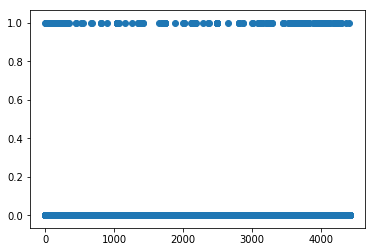

In [53]:
plt.scatter(indvars['recency'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

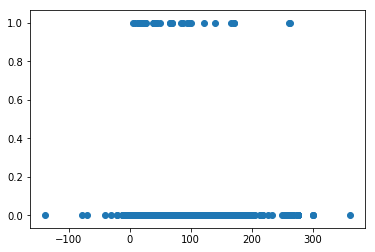

In [54]:
plt.scatter(indvars['avg'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

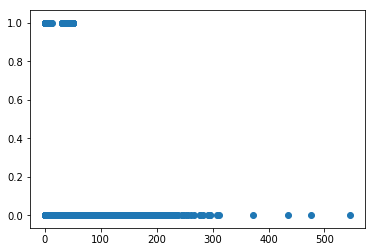

In [55]:
plt.scatter(indvars['Frequency'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

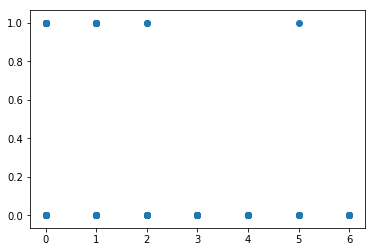

In [56]:
plt.scatter(indvars['CLASCODE_CM'], depvars2['EXRELDATEN'])
plt.grid()
plt.show()

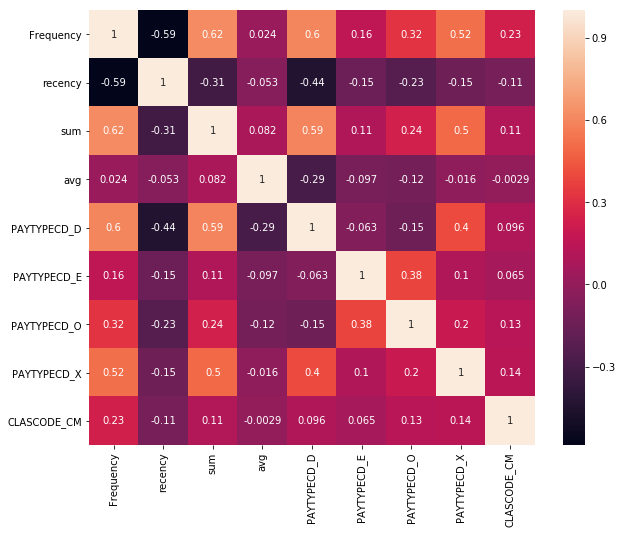

In [57]:
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(indvars.corr(), annot=True)
plt.show()

In [58]:
churned=depvars2[depvars2.EXRELDATEN==1]

In [59]:
active=depvars2.drop(churned.index,axis=0)

In [60]:
combo=pd.concat([active,churned])

In [61]:
subs=indvars.index.difference(combo.index)

In [62]:
indvars.drop(subs,axis=0,inplace=True)

In [63]:
a=indvars
indvars.head()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0001773,545,10.0,52168.79,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10.0,28243.57,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12.0,14648.45,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40.0,27620.49,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162.0,5687.19,15.005778,0.0,7.0,361.0,9.0,0


In [64]:
# Build the ML models

In [65]:
x_train, x_test, y_train, y_test= train_test_split(indvars,combo,test_size=0.2,random_state=0)

In [66]:
names=[
    "Nearest Neighbors", 
    "Linear SVM", 
    "RBF SVM", 
    "Decision Tree",
    "Gaussian Process",
    "Random Forest", 
    "AdaBoost",
    "Neural Net",
    "Naive Bayes", 
    "Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis",
    "Logistic Regression"
    ]

classifiers=[
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma='auto', C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianProcessClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=500),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
    ]

In [67]:

for i,j in zip(names,classifiers):
    j.fit(x_train,y_train)
    
    score = j.score(x_test,y_test)
    ypred=j.predict(x_test)    
    cv_acc=cross_val_score(estimator=j,X=x_train,y=y_train,cv=5)
    cm=confusion_matrix(y_test,ypred)
    cv_acc=cv_acc.mean()
    acc=accuracy_score(y_test,ypred)
    f1=f1_score(y_test,ypred,average='binary')
    auc = roc_auc_score(y_test,ypred)
    aps=average_precision_score(y_test,ypred)   
        
    print("+"*80)
    print("\n Classifier is \n" + str(i))
    print("\n Score \n" + str(score*100) + "%")
    print('\n Confusion Matrix \n',cm)
    print('\n Cross Validation Score \n',cv_acc)
    print('\n Testing Accuracy \n',acc)
    print('\n F1 Score \n',f1)
    print('\n AUC \n',auc)
    print('\n Average Precision Score \n',aps)
    print(j.get_params)
    
    if i=="Random Forest":
        feature_importances=pd.DataFrame(j.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
        print(feature_importances)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Nearest Neighbors

 Score 
98.44709281329%

 Confusion Matrix 
 [[2726    0]
 [  43    0]]

 Cross Validation Score 
 0.9806756087114946

 Testing Accuracy 
 0.9844709281328999

 F1 Score 
 0.0

 AUC 
 0.5

 Average Precision Score 
 0.015529071867100036
<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Linear SVM

 Score 
98.44709281329%

 Confusion Matrix 
 [[2726    0]
 [  43    0]]

 Cross Validation Score 
 0.9812173287613142

 Testing Accuracy 
 0.9844709281328999

 F1 Score 
 0.0

 AUC 
 0.5

 Average Precision Score 
 0.015529071867100036
<bound method BaseEstimator.get_params of SVC(C=0.025, cache_size=200, class_weight=None, coef

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-67-a9663d28c3bf>", line 7, in <module>
    cv_acc=cross_val_score(estimator=j,X=x_train,y=y_train,cv=5)
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 342, in cross_val_score
    pre_dispatch=pre_dispatch)
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 206, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

KeyboardInterrupt: 

In [ ]:
#Saving the Random Forest Model as it is best possible model
#According to the mentioned importance, we can reduce the number of features to make the model better. 
# Here, we remove features that have no or very little impact with regard to the model.

In [68]:
indvars=indvars[["Frequency","recency"]] 

In [69]:
#Re-Modeling
x_train,x_test,y_train,y_test=train_test_split(indvars,combo,test_size=0.2,random_state=0)

In [70]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print("\n Score \n" + str(score*100) + "%")
print(feature_importances)


 Score 
98.23040808956301%
           importance
recency      0.911204
Frequency    0.088796


In [71]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfe = RFE(rf, n_features_to_select=5)
rfe = rfe.fit(x_train, y_train)

In [72]:
y_pred=rfe.predict(x_test)

In [73]:
y_pred=pd.DataFrame(data=y_pred,index=x_test.index)

In [75]:
filename = 'C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\random_forest_model.sav'
pickle.dump(rfe, open(filename, 'wb'))

In [ ]:
#Validating the model

In [83]:
payhistory2=payhistory[((payhistory['PDATE']>=pd.Timestamp(2006,1,1)) & (payhistory['PDATE']<=pd.Timestamp(2006,12,31)))]

In [84]:
communication2=communication[((communication['CONTDATE']>=pd.Timestamp(2006,1,1)) & (communication['CONTDATE']<=pd.Timestamp(2006,12,31)))]

In [86]:
extrel2=extrel[((extrel['EXRELDATEN']>=pd.Timestamp(2006,1,1)) & (extrel['EXRELDATEN']<=pd.Timestamp(2006,12,31)))]

In [87]:
donors=(communication2['EXTRELNO'].unique())

In [88]:
indvars2=(communication2['EXTRELNO'].value_counts()).to_frame()

In [89]:
indvars2.index.names = ['EXTRELNO']
indvars2.rename(index={None:'EXTRELNO'},columns={'EXTRELNO':'Frequency'},inplace=True)

In [90]:
communication2['recency']=pd.Timestamp(2007,2,2)-communication2['CONTDATE']

In [91]:
indvars2['recency']=communication2.groupby('EXTRELNO').recency.min()
indvars2['sum']=payhistory2.groupby('EXTRELNO').PAMT.sum()
indvars2['avg']=payhistory2.groupby('EXTRELNO').PAMT.mean()

In [92]:
a=payhistory2
a.index=payhistory2.EXTRELNO
b=a['PAYTYPECD'].to_frame()

In [93]:
curvalb=pd.get_dummies(b['PAYTYPECD'],prefix='PAYTYPECD')

In [94]:
paytypeb=curvalb.groupby('EXTRELNO').sum()

In [95]:
indvars2=indvars2.join(paytypeb)

In [96]:
nameaddr.index=nameaddr['EXTRELNO']

In [97]:
indvars2.join(nameaddr['LANGUACODE'])
indvars2.head()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O
EXTRELNO,,,,,,,
0181194,201,38 days,3841.0,98.487179,39.0,0.0,0.0
0221225,63,52 days,276.0,23.000000,12.0,0.0,0.0
0223508,61,35 days,276.0,69.000000,0.0,4.0,0.0
0232989,59,59 days,276.0,23.000000,12.0,0.0,0.0
0235715,50,63 days,276.0,23.000000,0.0,12.0,0.0


In [98]:
complaints=communication2[communication2.CLASCODE=='CM']

In [ ]:
complaints.index=complaints['EXTRELNO']

In [99]:
a=indvars2
a=a.join(complaints['CLASCODE'])

In [100]:
curvalb=pd.get_dummies(a['CLASCODE'],prefix='CLASCODE')

In [101]:
#groupby index
curvalb=curvalb.groupby(curvalb.index).sum()

In [102]:
indvars2=indvars2.join(curvalb)

In [103]:
indvars2.head()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O
EXTRELNO,,,,,,,
0181194,201,38 days,3841.0,98.487179,39.0,0.0,0.0
0221225,63,52 days,276.0,23.000000,12.0,0.0,0.0
0223508,61,35 days,276.0,69.000000,0.0,4.0,0.0
0232989,59,59 days,276.0,23.000000,12.0,0.0,0.0
0235715,50,63 days,276.0,23.000000,0.0,12.0,0.0


In [104]:
inco=communication2[communication2.CONTDIREC=='I']

In [105]:
inco.index=inco['EXTRELNO']

In [106]:
a=indvars2
a=a.join(inco['CONTDIREC'])
curvalb=pd.get_dummies(a['CONTDIREC'],prefix='CONTDIREC')

In [107]:
curvalb.index.unique()

Index(['0000020', '0000035', '0000072', '0000081', '0000089', '0000100',
       '0000105', '0000109', '0000113', '0000114',
       ...
       '0244678', '0244687', '0244698', '0244704', '0244715', '0244728',
       '0244730', '0244733', '0244735', '0244736'],
      dtype='object', name='EXTRELNO', length=10921)

In [108]:
indvars2.isnull().sum().sort_values(ascending=False)

PAYTYPECD_O    810
PAYTYPECD_E    810
PAYTYPECD_D    810
avg            810
sum            810
recency          0
Frequency        0
dtype: int64

In [109]:
a=indvars2[(indvars2['PAYTYPECD_O'].isnull()==True) | (indvars2['PAYTYPECD_E'].isnull()==True) | (indvars2['PAYTYPECD_D'].isnull()==True)]
PAYTYPECD_X=pd.Series(index=a.index,name='PAYTYPECD_X')

In [110]:
PAYTYPECD_X.fillna(1,inplace=True)
indvars2=indvars2.join(PAYTYPECD_X)

In [111]:
indvars2['PAYTYPECD_O'].fillna(value=0,inplace=True)
indvars2['PAYTYPECD_D'].fillna(value=0,inplace=True)
indvars2['PAYTYPECD_E'].fillna(value=0,inplace=True)
indvars2['PAYTYPECD_X'].fillna(value=0,inplace=True)

In [112]:
indvars2.isnull().sum().sort_values(ascending=False)

avg            810
sum            810
PAYTYPECD_X      0
PAYTYPECD_O      0
PAYTYPECD_E      0
PAYTYPECD_D      0
recency          0
Frequency        0
dtype: int64

In [113]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars2[['avg']])
indvars2['avg'] = mean.transform(indvars2[['avg']])

In [114]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(indvars2[['sum']])
indvars2['sum'] = mean.transform(indvars2[['sum']])

In [118]:
indvars2.isnull().sum().sort_values(ascending=False)

PAYTYPECD_X    0
PAYTYPECD_O    0
PAYTYPECD_E    0
PAYTYPECD_D    0
avg            0
sum            0
recency        0
Frequency      0
dtype: int64

In [119]:
extrel2.index=extrel2['EXTRELNO']
indvars2.drop(extrel2.index,errors='ignore',inplace=True)

In [120]:
s=pd.Series(index=indvars2.index)
for i in range(len(indvars2['recency'])):
    s[i]=indvars2['recency'][i].days

In [121]:
indvars2['recency']=s

In [123]:
depvars2=extrel[((extrel['EXRELDATEN']>=pd.Timestamp(2007,1,1)) & (extrel['EXRELDATEN']<=pd.Timestamp(2007,2,2))) | (extrel['EXRELDATEN'].isnull()==True)]

In [124]:
depvars2.index=depvars2['EXTRELNO']

In [125]:
a=depvars2[depvars2['EXRELDATEN'].isnull()==False]

In [126]:
depvars2b=pd.DataFrame(index=indvars2.index)

In [127]:
a['EXRELDATEN']=1

In [128]:
depvars2b=depvars2b.join(a['EXRELDATEN'])
depvars2b.fillna(value=0,inplace=True)

In [129]:
depvars2b['EXTRELNO']=depvars2b.index

In [130]:
depvars2b.drop_duplicates(subset='EXTRELNO',inplace=True)

In [131]:
depvars2b.drop("EXTRELNO",axis=1,inplace=True)

In [ ]:
#Testing score for previously trained model with new data

In [133]:
model = pickle.load(open('C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\random_forest_model.sav', 'rb'))

In [134]:
indvars2=indvars2[["Frequency","recency"]]

In [135]:
y_pred=model.predict(indvars2)

In [136]:
y_pred=pd.DataFrame(data=y_pred,index=depvars2b.index)

In [137]:
metrics.confusion_matrix(depvars2b,y_pred,[1,0])

array([[    0,    41],
       [    5, 10285]], dtype=int64)

In [138]:
#Accuracy of our model
metrics.accuracy_score(depvars2b, y_pred )

0.995547381666828